# Question théoriques

L'estimation proposée provient de la loi forte des grands nombres.


On note $Y$ les composantes de $Z$ des profondeurs connus et X les inconnues
On a pour un vecteur $x$ de profondeurs
$$f_Z = f_{Y|X=x} f_X,$$

$C$ peut se décomposer en blocs :  
$$C=\begin{pmatrix}
   C_Y & C_{Y,X} \\
   C_{X,Y} & C_X 
\end{pmatrix}$$

où $C_Y = Cov(Y,Y)$, $C_X = Cov(X,X)$, $ C_{X,Y}=Cov(X,Y)$ et $C_{Y,X} = Cov(Y,X)$.

C'est-à-dire que la variable aléatoire $Y|X=x$ est gaussienne d'espérance $$m_{Y|X=x} = m_Y + C_{Y,X}C_X^{-1}(x-m_X)$$ et de matrice de covariance $$CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y}$$. Autrement dit, l'espérance conditionnelle de $Y$ sachant $X$ est la variable aléatoire $E(Y|X) =(m_Y + C_{Y,X}C_X^{-1}(X-m_X))$.


Pour déterminer la loi de ce vecteur aléatoire un va utiliser la fonction caractéristique
Pour la variable Z=m+RY on a pour tout u vecteur de $\mathbf{R}^{d}$
$$ \Phi_{m+RY}(u)=e^{i<u,m>}\Phi_{Y}(R^{t}u)$$

donc comme Y suit une loi normale centrée réduite

$$ \Phi_{m+RY}(u)=exp(i<u,m>-\frac{\|R^{t}u \|}{2})$$
Soit
$$ \Phi_{m+RY}(u)=exp(i<u,m>-\frac{<R^{t}u,R^{t}u>}{2})$$
En utilisant l'adjoint de la matrice $R^{t}$, noté $R^{t*}$,
On obtient que
$$ \Phi_{m+RY}(u)=exp(i<u,m>-\frac{<u,R^{t*}R^{t}u>}{2})$$
on obtient puisque la fonction caractéristique caractérise la loi que la varaiable $Z$ suit une loi normale d'espérance $m$ et de matrice de covariance $R^{t*}R^{t}$



Pour simuler une $Z$ une variable aléatoire suivant une loi normale de matrice de covaiance $C$ et d'espérance $m$ on écrit la décompositionde Choleski de C. On dispose d'une matrice triangulaire supérieure $L$ tel que $C=LL^{t}$. Alors le vecteur $Z$ peut s'écrire $Z=m+LY$ où $Y$ suit une loi normale centrée réduite. $Z$ est donc décomposée selon la forme attendue par la question 3

# Questions

In [1]:
#Paramètres

import numpy as np
import matplotlib.pyplot as plt
import math
A=0
B=500
N=101
Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization=discretization_indexes*Delta

mu=-5
a=50
sigma2=12
observation_indexes=[0,20,40,60,80,100]
depth=np.array([0,-4,-12.8,-1,-6.5,0])
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

In [8]:
#1
def C(h,a,sigma2):
    return sigma2*np.exp(-np.abs(h)/a)

def Cov(d,a,sigma2):
    return C(np.abs(d),a,sigma2)



In [3]:
#2
Mdistance=np.zeros((N,N))
for i in range (N):
    for j in range(N):
        Mdistance[i,j]= np.abs(discretization[i]-discretization[j])

In [9]:
#3
Mcov=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Mcov[i,j]=Cov((discretization[i]-discretization[j]),a,sigma2)

In [10]:
#4
def extraction (M,indice1,indice2):
    N1=len(indice1)
    N2=len(indice2)
    Mat=np.zeros((N1,N2))
    for i in range (N1):
        for j in range (N2):
            Mat[i,j]=M[indice1[i],indice2[j]]
    return Mat



In [11]:
#4
C_known_known=extraction(Mcov,observation_indexes,observation_indexes)
C_known_unknown=extraction(Mcov,observation_indexes,unknown_indexes)
C_unknown_unknown=extraction(Mcov,unknown_indexes,unknown_indexes)
C_unknown_known=extraction(Mcov,unknown_indexes,observation_indexes)

In [12]:
#5
#On utilise ici les résulats de la question théorique 2 où la varaible Y correspond aux pronfondeurs
#connus et X aux inconnus

CY=C_unknown_unknown
CX=C_known_known
CXY=C_known_unknown
CYX=C_unknown_known

#On définit les dimensions de X et Y

nX=len(observation_indexes)
nY=N-nX

# Et les vecteurs epérances

m=np.array([mu for i in range(N)])
mY=np.array([mu for i in range(nY)])
mX=np.array([mu for i in range(nX)])

#Puis on sait que la variable Y|X=x suit une une loi normale de paramètre mYx et de covariance CSY

x=depth
mYx=mY-np.dot(CYX,np.dot(np.linalg.inv(CX),(mX-x)))
CSY=CY-np.dot(CYX,np.dot(np.linalg.inv(CX),CXY))

[  0.          -0.46688335  -0.88839774  -1.26876184  -1.61178245
  -1.92089264  -2.19918609  -2.44944805  -2.67418323  -2.87564085
  -3.05583718  -3.21657567  -3.35946505  -3.4859354   -3.59725249
  -3.69453041  -3.77874275  -3.85073233  -3.91121966  -3.96081011
  -4.          -4.31432093  -4.62177936  -4.92545243  -5.2283794
  -5.53359206  -5.8441451   -6.16314662  -6.49378931  -6.83938234
  -7.20338453  -7.58943893  -8.00140931  -8.4434188   -8.91989118
  -9.43559515  -9.99569205 -10.60578751 -11.27198758 -12.00095981
 -12.8        -11.91810571 -11.10545015 -10.35389999  -9.65593346
  -9.00456508  -8.39327573  -7.81594742  -7.26680206  -6.74034362
  -6.23130312  -5.73458592  -5.2452207   -4.75830973  -4.26897984
  -3.77233366  -3.26340058  -2.73708703  -2.18812549  -1.61102176
  -1.          -1.43702815  -1.83839689  -2.20812324  -2.54990754
  -2.8671705   -3.16308739  -3.44061983  -3.70254547  -3.95148576
  -4.18993216  -4.42027113  -4.64480797  -4.86578994  -5.08542869
  -5.305922

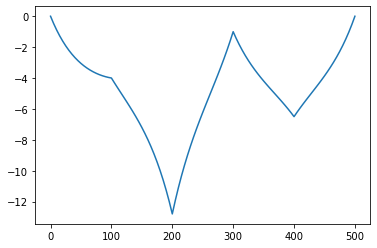

In [13]:
#on va crée une liste qui donne les profondeurs estimées et mesurées. Pour cela on
#on distingue si l'indice est dans les indices observés ou pas (on introduit pour ce faire deux
#compteurs T et K)
Fond=np.zeros(N)
T=0
K=0
for i in range (N):
    if i in observation_indexes:
        Fond[i]=depth[T]
        T+=1
    else :
        Fond[i]=mYx[K]
        K+=1
print(Fond)
plt.figure()
plt.plot(discretization,Fond)
plt.show()

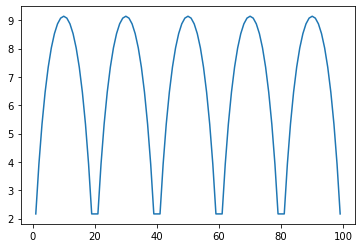

In [14]:
#6
#La matrice de cov conditionnelle a déjà été calculé c'est CSY
CSY=CY-np.dot(CYX,np.dot(np.linalg.inv(CX),CXY))
Var=np.array([CSY[i,i] for i in range (len(CSY))])

plt.figure()
plt.plot(np.array(unknown_indexes),Var)
plt.show()

#On constate que la variance devient de plus en plus grande à mesure que l'on s'éloigne
#des valeurs mesurées.

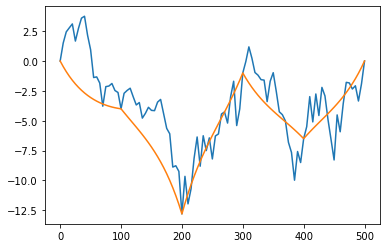

In [15]:
#7
#On écrit une fonction Simu() qui effectue la simulation conditionelle
def Simu():
    #Simulation d'une loi gaussienne à partir de deux variables suivant une uniforme
    U=np.random.uniform(0,1,nY)
    V=np.random.uniform(0,1,nY)
    Y=np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
    #On utilise la méthode de la question 4 avec la décomposition de Choleski
    L=np.linalg.cholesky(CSY)
    Z=mYx+np.dot(L,Y)
    #A nouveau il faut le vecteur complet observation et estimations, on réutilise deux compteurs.
    Zf=np.zeros(N)
    T=0
    K=0
    for i in range (N):
        if i in observation_indexes:
            Zf[i]=depth[T]
            T+=1
        else :
            Zf[i]=Z[K]
            K+=1
    return Zf
plt.figure()
plt.plot(discretization,Simu())
plt.plot(discretization,Fond)
plt.show()


In [16]:
#8
def L(X,Delta):
    S=0
    for i in range (1,len(X)):
        S+=np.sqrt(Delta**2 +(X[i]-X[i-1])**2)
    return S

In [18]:
#9

#La fonction suivante renvoie une longueur de cable calculée avec la moyenne de n simulation
def SimuLongueur(n):
    l=np.zeros(n)
    for i in range (n):
        X=Simu()
        l[i]=L(X,Delta)
    return np.sum(np.array(l))/len(l)

#On illustre le résultat avec 100 simulation


print (SimuLongueur(100))

522.0603121810692


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


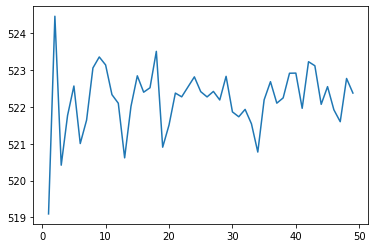

In [22]:
#10

#On représente la suite des moyennes longueurs simulées jusqu'au rang n

def SuiteLongueurs(n):
    ly=np.zeros(n)
    for k in range (n):
        ly[k]=SimuLongueur(k)
    return ly

lx=np.arange(50)
plt.figure()
plt.plot(lx,SuiteLongueurs(50))
plt.show()

#On constate alors que plus le nombre de simulation est grand plus la moyenne observée
#se rapproche d'une valeur de convergence. C'est une illustration de la loi forte des grand nombre.

In [ ]:
#11
#La fonction suivante va générer k simulation
def GenerationLongueurs(k):
    l=np.zeros(k)
    for i in range (k):
        X=Simu()
        l[i]=L(X,Delta)
    return l

#On représente alors l'histogramme de ces k simulations avec
#200 intervalle entre 500 et 540 mètres. Ici pour k=10000

ly=GenerationLongueurs(1000)
bin=200
histo=plt.hist(ly,range=(500,540),bins=bin)
plt.show()


In [ ]:
#12
#Méthode 1 
#On identifie tout d'abord dans l'histogramme quel est lindice de l'intervalle possédant
#le plus d'occurences que l'on identifiera à la moyenne. Ensuite, on se déplacera d'intervalle en intervalle
#jusqu'à ce que la probabilité de présence dans l'intervalle ddiscret soit < 0.05

#On code d'abord une fonction indiceMax pour trouver l'intervalle de la moyenne observée
def indiceMax(occurences):
    index=0
    for i in range(len(occurences)):
        if occurences[i]>occurences[index]:
            index=i
    return index

def intervalleConfiance1(n):
    #On génère l'histogramme
    l=GenerationLongueurs(n)
    bin=200
    histo=plt.hist(l,range=(500,540),bins=bin)
    occurences=histo[0]
    #On initialise les indices limites de l'intervalle de confiance au niveau de la moyenne
    indexM=indiceMax(occurences)
    indexm=indiceMax(occurences)
    proba=1
    #On avance "à droite" de la moyenne jusqu'à ce que la probabilité soit <0.05
    while proba > 0.05:
        indexM+=1
        proba=histo[0][indexM]/n
    index_max=indexM-1
    proba=1
    #On avance "à gauche" de la moyenne jusqu'à ce que la probabilité soit <0.05
    while proba > 0.05:
        indexm-=1
        proba=histo[0][indexm]/n
    index_min=indexm-1
    #On donne l'intervalle correrspondant au indices de l'histogramme trouvé
    return [histo[1][index_min],histo[1][index_max]]

#Méthode 2
#Celle-ci consiste à utiliser directement la formule de l'intervalle de confiance pour n variables
#aléatoires suivant une loi gaussienne.

def intervalleConfiance2(n):
    Moyenne=SimuLongueur(n)
    #On fait d'abord une estimation de l'écart type.
    EcartType=np.sqrt(sum([(x-Moyenne)**2 for x in GenerationLongueurs(n)])/n)
    print(EcartType)
    return np.array([Moyenne -1.96*EcartType/np.sqrt(n),Moyenne+1.96*EcartType/np.sqrt(n)])

#Pour une valeur de n fixé la méthode 2 donne un intervalle de confiance autour de la moyenne beaucoup plus précis

In [ ]:
#13
#On estime cette probabilité pour 10000 lancers
n=10000
S=0
for i in range (n):
    a=Simu()
    if L(a,Delta)>525:
        S+=1
print(S/n)


In [ ]:
#14
#On simule pour différentes valeurs de n

n=1000

#Longueurs moyenne pour n

print (SimuLongueur(n))

#Suite des moyennes de longuerus

lx=np.arange(n)
plt.figure()
plt.plot(lx,SuiteLongueurs(n))
plt.show()

#histogramme pour n donné

ly=GenerationLongueurs(n)
bin=200
histo=plt.hist(ly,range=(500,540),bins=bin)
plt.show()

#intervalle de confiance

print(intervalleConfiance1(n))
print(intervalleConfiance2(n))